In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Надо проанализировать данные и выяснить, в какое время суток наблюдается самая высокая аактивность пользовательей с точки зрения транзакций

In [2]:
data = pd.read_csv('Order_details(masked).csv')

In [3]:
data.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


Преобразуем столбец Transaction Date, переименцем его и приведем дату к формату YYYY-MM-DD HH:MM:SS

In [4]:
data['Time'] = pd.to_datetime(data['Transaction Date'])

In [5]:
data.head()

,Name,Email,Product,Transaction Date,Time
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,2021-01-03 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,2021-01-03 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,2021-01-03 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,2021-01-03 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,2021-01-03 10:56:46


Для ответа на поставленный вопрос нам нужны только часы, поэтому добавляем колонку только с часами

In [8]:
data['Hours'] = (data['Time']).dt.hour

In [9]:
data.head()

,Name,Email,Product,Transaction Date,Time,Hours
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,2021-01-03 00:47:26,0
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,2021-01-03 02:04:07,2
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,2021-01-03 09:10:43,9
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,2021-01-03 09:49:48,9
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,2021-01-03 10:56:46,10


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              581 non-null    object        
 1   Email             581 non-null    object        
 2   Product           581 non-null    object        
 3   Transaction Date  581 non-null    object        
 4   Time              581 non-null    datetime64[ns]
 5   Hours             581 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 25.1+ KB


In [11]:
data.describe()

,Time,Hours
count,581,581.000000
mean,2021-04-24 05:53:32.447504384,15.666093
min,2021-01-03 00:47:26,0.000000
25%,2021-03-03 19:09:15,12.000000
50%,2021-05-03 11:31:35,16.000000
75%,2021-06-03 23:53:25,20.000000
max,2021-07-03 23:59:26,23.000000
std,NaN,5.520998


In [13]:
data.shape

(581, 6)

Далее считаем как часто появляется то или иное время

In [61]:
count_time = data['Hours'].value_counts()

In [62]:
count_time

Hours
23    51
12    51
22    45
19    42
21    41
15    41
20    39
11    37
13    33
18    33
16    29
14    28
17    27
10    24
0     17
9     14
8     10
7      6
1      4
2      3
5      3
6      2
3      1
Name: count, dtype: int64

In [75]:
count_time_hour = []
for i in range(0, 23):
    count_time_hour.append(i)

In [76]:
count_time_index = count_time.sort_index()
count_time_index.tolist()
count_time_index = pd.DataFrame(count_time_index)
count_time_index

,count
Hours,
0,17
1,4
2,3
3,1
5,3
6,2
7,6
8,10
9,14


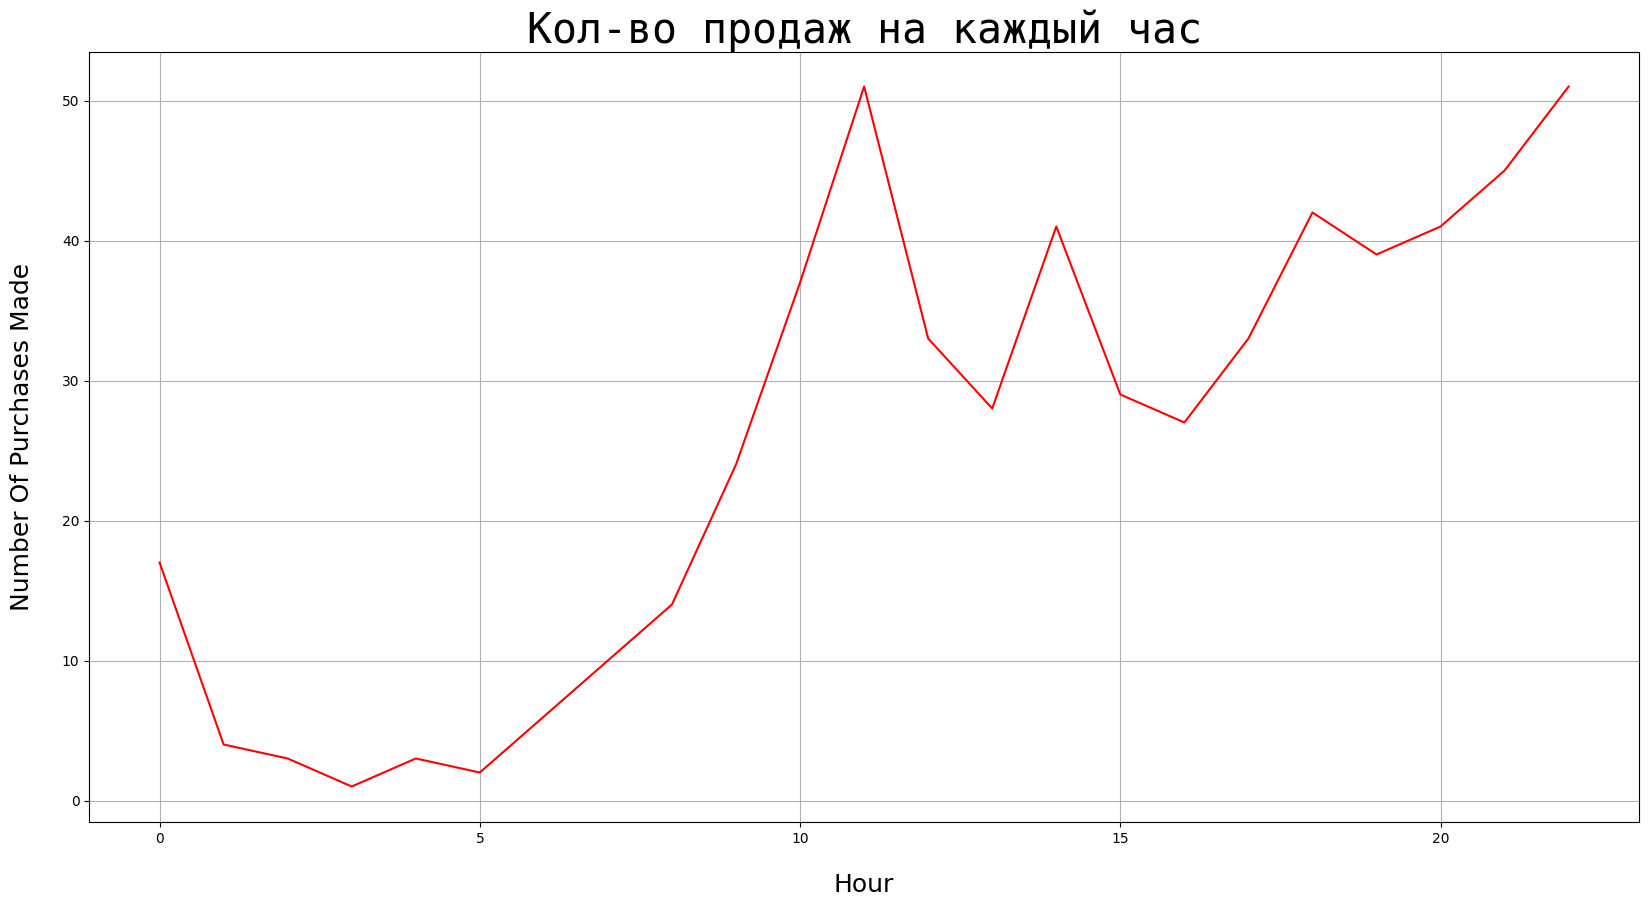

In [86]:
plt.figure(figsize=(20, 10))

plt.title('Кол-во продаж на каждый час',
          fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1)

plt.ylabel("Number Of Purchases Made", fontsize=18, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(count_time_hour, count_time_index, color='r')
plt.grid()
plt.show()

По результатам анализа данных видно, что больше всего покупок происходит в полдень и поздно вечером